In [1]:
import sys 
# sys.version

In [2]:
import pandas as pd
from datetime import datetime, date
from pyspark.sql import Row
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

22/10/05 18:28:43 WARN Utils: Your hostname, DESKTOP-HNKMAAU resolves to a loopback address: 127.0.1.1; using 172.17.188.210 instead (on interface eth0)
22/10/05 18:28:43 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/10/05 18:28:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
# data = pd.read_csv('./merge_new2.csv') ## all data
# dataset = pd.read_csv('./is_fraud_dataset.csv')
# data_half_year = data[data['order_datetime'] > '2022-03-31']

In [4]:
data_half_year = pd.read_parquet('../data/curated/data_half_year_deleted.parquet')

In [5]:
data_half_year

,user_id,merchant_abn,dollar_value,order_datetime,state,postcode,gender,consumer_id,name_y,tags,...,2011-2021%,Area,Population density 2021,Earners (persons)2017-18,Median age of earners (years)2017-18,Sum ($)2017-18,Median ($)2017-18,Mean ($)2017-18,fraud_probability_x,fraud_probability_y
8,22291,64203420245,10.447550,2022-04-01,VIC,3159,Female,406308,Pede Nonummy Corp.,tent and awning shops,...,-3.1,55.7,181.4,6191.0,44.0,395846396.0,51296.0,63939.0,NaN,NaN
19,11146,19933438190,9.338781,2022-04-01,WA,6532,Male,1238525,Dui Nec Corporation,tent and awning shops,...,-1.1,26161.9,0.2,3227.0,50.0,181786929.0,40598.0,56333.0,NaN,NaN
23,22301,87457891433,41.710616,2022-04-01,WA,6351,Undisclosed,1195567,Magna Sed Incorporated,artist supply and craft shoPs,...,-7.4,28626.2,0.2,2967.0,46.0,218436784.0,57165.0,73622.0,NaN,NaN
24,11148,71528203369,7.960986,2022-04-01,NSW,2646,Female,285057,Ipsum Primis Associates,"watch, clock, and jewelry repair shops",...,7.5,4495.2,1.6,3763.0,49.0,183502253.0,42112.0,48765.0,NaN,NaN
25,22301,16644129035,31.736720,2022-04-01,WA,6351,Undisclosed,1195567,Magna Associates,artist supply anD craft shops,...,-7.4,28626.2,0.2,2967.0,46.0,218436784.0,57165.0,73622.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102051,24055,79417999332,72.730216,2022-08-28,QLD,4608,Male,1379674,Phasellus At Company,"gift, card, novelty, and souvenIr shops",...,0.2,4332.3,2.2,4031.0,48.0,164337558.0,36531.0,40768.0,NaN,NaN
3102060,24064,81572403264,36.966756,2022-08-28,QLD,4516,Male,1229346,Interdum Curabitur Company,"digital goods: books, movies, music",...,14.1,101.2,43.0,2525.0,44.0,137312885.0,46865.0,54381.0,NaN,NaN
3102061,24064,19933438190,2.382190,2022-08-28,QLD,4516,Male,1229346,Dui Nec Corporation,tent and awning shops,...,14.1,101.2,43.0,2525.0,44.0,137312885.0,46865.0,54381.0,NaN,NaN
3102072,24077,80779820715,56.650642,2022-08-28,QLD,4474,Female,831103,Euismod Enim LLC,"watch, clock, and jewelry repair shops",...,-18.1,188751.6,0.0,1455.0,46.0,68532842.0,43303.0,47102.0,NaN,NaN


In [6]:
data_half_year.to_csv('data_half_year.csv',index = 0)

In [7]:
store_usercnt = data_half_year[['name_y','user_id','merchant_abn','dollar_value']].groupby('name_y').user_id.nunique().reset_index()
target_store_list = store_usercnt[ store_usercnt.user_id > 3]['name_y'] ## 清除容易有fraud的商家
print('target_store_list:',len(target_store_list))
data_half_year = data_half_year[data_half_year['name_y'].isin(target_store_list)]

target_store_list: 2386


In [8]:
data_half_year

,user_id,merchant_abn,dollar_value,order_datetime,state,postcode,gender,consumer_id,name_y,tags,...,2011-2021%,Area,Population density 2021,Earners (persons)2017-18,Median age of earners (years)2017-18,Sum ($)2017-18,Median ($)2017-18,Mean ($)2017-18,fraud_probability_x,fraud_probability_y
8,22291,64203420245,10.447550,2022-04-01,VIC,3159,Female,406308,Pede Nonummy Corp.,tent and awning shops,...,-3.1,55.7,181.4,6191.0,44.0,395846396.0,51296.0,63939.0,NaN,NaN
19,11146,19933438190,9.338781,2022-04-01,WA,6532,Male,1238525,Dui Nec Corporation,tent and awning shops,...,-1.1,26161.9,0.2,3227.0,50.0,181786929.0,40598.0,56333.0,NaN,NaN
23,22301,87457891433,41.710616,2022-04-01,WA,6351,Undisclosed,1195567,Magna Sed Incorporated,artist supply and craft shoPs,...,-7.4,28626.2,0.2,2967.0,46.0,218436784.0,57165.0,73622.0,NaN,NaN
24,11148,71528203369,7.960986,2022-04-01,NSW,2646,Female,285057,Ipsum Primis Associates,"watch, clock, and jewelry repair shops",...,7.5,4495.2,1.6,3763.0,49.0,183502253.0,42112.0,48765.0,NaN,NaN
25,22301,16644129035,31.736720,2022-04-01,WA,6351,Undisclosed,1195567,Magna Associates,artist supply anD craft shops,...,-7.4,28626.2,0.2,2967.0,46.0,218436784.0,57165.0,73622.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102051,24055,79417999332,72.730216,2022-08-28,QLD,4608,Male,1379674,Phasellus At Company,"gift, card, novelty, and souvenIr shops",...,0.2,4332.3,2.2,4031.0,48.0,164337558.0,36531.0,40768.0,NaN,NaN
3102060,24064,81572403264,36.966756,2022-08-28,QLD,4516,Male,1229346,Interdum Curabitur Company,"digital goods: books, movies, music",...,14.1,101.2,43.0,2525.0,44.0,137312885.0,46865.0,54381.0,NaN,NaN
3102061,24064,19933438190,2.382190,2022-08-28,QLD,4516,Male,1229346,Dui Nec Corporation,tent and awning shops,...,14.1,101.2,43.0,2525.0,44.0,137312885.0,46865.0,54381.0,NaN,NaN
3102072,24077,80779820715,56.650642,2022-08-28,QLD,4474,Female,831103,Euismod Enim LLC,"watch, clock, and jewelry repair shops",...,-18.1,188751.6,0.0,1455.0,46.0,68532842.0,43303.0,47102.0,NaN,NaN


In [9]:
# cleaned tags
data_half_year['tags'] = data_half_year.tags.str.lower()
tags_df = pd.DataFrame(data_half_year.tags.str.lower().str.strip().value_counts())

/home/ydde1/miniconda3/envs/ads/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
tags_df

,tags
tent and awning shops,71308
"gift, card, novelty, and souvenir shops",65906
"digital goods: books, movies, music",53786
"watch, clock, and jewelry repair shops",40514
"cable, satellite, and other pay television and radio services",33618
...,...
bicycle shops - sales and service,5
"watch, clock, and jewelry repair shops",4
"opticians, optical goods, and eyeglasses",4
"jewelry, watch, clock, and silverware shops",4


In [11]:
data_half_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490175 entries, 8 to 3102073
Data columns (total 25 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   user_id                               490175 non-null  int64  
 1   merchant_abn                          490175 non-null  int64  
 2   dollar_value                          490175 non-null  float64
 3   order_datetime                        490175 non-null  object 
 4   state                                 490175 non-null  object 
 5   postcode                              490175 non-null  int64  
 6   gender                                490175 non-null  object 
 7   consumer_id                           490175 non-null  int64  
 8   name_y                                490175 non-null  object 
 9   tags                                  490175 non-null  object 
 10  revenue_levels                        490175 non-null  object 
 11 

## 整理商家信息 store
- 筛选目标的tags作为细分市场
    - furniture
    - music shops
    - gift

In [12]:
def get_stat(data_half_year):
    ## 购买用户数UV
    store_usercnt = data_half_year.groupby('name_y').user_id.nunique().reset_index()

    ## 售出商品类型量
    store_merchcnt = data_half_year.groupby('name_y').merchant_abn.nunique().reset_index()

    ## 有交易的日期数量
    store_openday = data_half_year[['name_y','order_datetime']].groupby('name_y').order_datetime.nunique().reset_index()

    ## 总商品数量
    store_mer_sold = data_half_year.groupby('name_y')['merchant_abn'].count()

    ## 统计数据平均值
    store_stat = data_half_year.groupby('name_y')['take_rate','2021','Population density 2021','Earners (persons)2017-18',
                                    'Median age of earners (years)2017-18','Sum ($)2017-18','Mean ($)2017-18','Median ($)2017-18'].mean()

    ## 交易额
    store_gmv = data_half_year.groupby('name_y')['dollar_value'].sum()

    ## 收入level
    store_level = data_half_year.groupby('name_y')['revenue_levels'].max()
    
    ## 合并
    store_df = pd.merge(store_usercnt,store_merchcnt,on = 'name_y')
    store_df = pd.merge(store_df,store_openday,on = 'name_y')
    store_df = pd.merge(store_df,store_mer_sold,on = 'name_y')
    store_df = pd.merge(store_df,store_stat,on = 'name_y')
    store_df = pd.merge(store_df,store_gmv,on = 'name_y')
    store_df = pd.merge(store_df,store_level,on = 'name_y')
    
    store_df.columns = ['store_name', 'user_cnt', 'merchant_type_num', 'open_day',
       'merchant_sold_cnt', 'avg_take_rate', 'avg_population_2021', 'avg_population_density_2021',
       'avg_earners_2017to18', 'avg_MedianAgeOfEarners2017to18',
       'avg_IncomeSum2017to18', 'avg_IncomeMean2017to18', 'avg_IncomeMedian2017to18',
       'sum_dollar_value', 'max_revenue_levels']
    
    ## 对于BNPL的收入
    store_df['revenue'] = store_df.sum_dollar_value * store_df.avg_take_rate
    
    ## 衍生变量
    store_df['ARPU'] = store_df.sum_dollar_value/store_df.user_cnt
    store_df['order_per_user'] = store_df.merchant_sold_cnt/store_df.user_cnt
    
    return store_df

In [13]:
store_df_all = get_stat(data_half_year)
store_df_all

/home/ydde1/miniconda3/envs/ads/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user
0,A Aliquet Ltd,42,1,34,42,3.87,8590.605263,330.207895,5929.142857,45.642857,3.623270e+08,58208.714286,46787.595238,5782.651774,b,22378.862364,137.682185,1.000000
1,A Arcu Industries,40,1,37,41,3.00,9699.085714,1063.480000,7909.463415,43.731707,5.310454e+08,60518.024390,45739.756098,6814.179651,c,20442.538954,170.354491,1.025000
2,A Arcu Sed Company,55,1,47,55,2.38,11263.782609,1157.250000,8668.472727,43.254545,6.204245e+08,63206.327273,48876.072727,5875.313599,c,13983.246365,106.823884,1.000000
3,A Auctor Non Corporation,455,1,146,480,5.58,9837.288835,880.379612,8167.635021,43.398734,5.306768e+08,60848.924051,46147.350211,35120.104053,a,195970.180616,77.187042,1.054945
4,A Consulting,6,1,6,6,1.88,9478.400000,2521.280000,10164.333333,43.666667,7.299792e+08,63067.666667,43694.333333,974.413049,c,1831.896531,162.402175,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,Vulputate LLC,156,1,100,161,2.42,10114.900709,899.635461,7709.875776,43.763975,5.242259e+08,62168.869565,47567.695652,15298.988811,c,37023.552924,98.070441,1.032051
2382,Vulputate Lacus Cras Ltd,12,1,12,12,5.79,9574.727273,23.981818,7230.666667,46.000000,4.114356e+08,53370.833333,41678.166667,1462.278493,a,8466.592473,121.856541,1.000000
2383,Vulputate Posuere Vulputate Foundation,114,1,80,114,4.47,8811.322917,452.786458,7501.990991,44.549550,4.767056e+08,59251.180180,45071.729730,17101.787453,b,76444.989915,150.015679,1.000000
2384,Vulputate Velit Eu Limited,573,1,145,615,3.09,9584.765568,742.191758,7088.586885,44.357377,4.647606e+08,61242.172131,46770.181967,12823.096433,c,39623.367979,22.378877,1.073298


## 排序逻辑
**Object：最大化 gmv * take rate**
- 收入最高

In [14]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [15]:
results = smf.ols("sum_dollar_value ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + avg_take_rate + \
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + ARPU +order_per_user +\
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_all).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_dollar_value   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     704.0
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:29:00   Log-Likelihood:                -26227.
No. Observations:                2386   AIC:                         5.249e+04
Df Residuals:                    2368   BIC:                         5.259e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [16]:
results = smf.ols("revenue ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + ARPU +order_per_user +\
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + \
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_all).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     388.4
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:29:01   Log-Likelihood:                -30757.
No. Observations:                2386   AIC:                         6.155e+04
Df Residuals:                    2369   BIC:                         6.165e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [17]:
## 排序系统
results = smf.ols("revenue ~ user_cnt + open_day + merchant_sold_cnt + ARPU + order_per_user + C(max_revenue_levels)", data=store_df_all).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     692.4
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:29:01   Log-Likelihood:                -30758.
No. Observations:                2386   AIC:                         6.154e+04
Df Residuals:                    2376   BIC:                         6.159e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [18]:
store_df_all['pred_revenue'] = results.predict(store_df_all)

store_df_all = store_df_all.sort_values(by = 'pred_revenue', ascending= False).reset_index(drop=1)
store_df_all.head(30)

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Leo In Consulting,3751,1,150,11820,6.43,10043.836704,867.684292,7984.335809,43.519846,5.235811e+08,61120.411609,46785.403841,408637.640957,a,2.627540e+06,108.940987,3.151160,1.717872e+06
1,Erat Vitae LLP,3795,1,150,12464,2.94,9955.340829,845.321207,7836.018013,43.583764,5.149332e+08,61202.828110,46956.308805,377326.231468,c,1.109339e+06,99.427202,3.284321,1.687460e+06
2,Non Vestibulum Industries,3702,1,150,10661,5.80,9930.003908,841.015793,7822.601568,43.625850,5.133119e+08,61220.280329,46825.811130,310944.210163,a,1.803476e+06,83.993574,2.879795,1.668456e+06
3,Pede Nonummy Corp.,3749,1,150,11404,2.86,9966.378213,848.735904,7841.067848,43.584854,5.166172e+08,61466.793180,47128.808503,329825.912636,c,9.433021e+05,87.977037,3.041878,1.645962e+06
4,Lacus Consulting,3640,1,150,9842,6.98,10050.135344,838.518319,7941.984652,43.542822,5.231606e+08,61369.970531,46824.653024,363242.858087,a,2.535435e+06,99.791994,2.703846,1.637315e+06
5,Est Nunc Consulting,3553,1,150,9289,6.01,9873.789454,836.552353,7856.048534,43.549511,5.185144e+08,61487.381107,47119.197720,383720.106573,a,2.306158e+06,107.998904,2.614410,1.586237e+06
6,Suspendisse Dui Corporation,3643,1,150,10015,2.93,9916.533711,859.118099,7767.244713,43.676334,5.113148e+08,61391.913998,46927.407956,297846.955859,c,8.726916e+05,81.758703,2.749108,1.570267e+06
7,Lorem Ipsum Sodales Industries,3491,1,150,8492,4.47,10060.941632,846.263762,8058.269642,43.550083,5.324741e+08,61374.299312,46785.716592,383629.608803,b,1.714824e+06,109.891037,2.432541,1.523418e+06
8,Ipsum Dolor Sit Corporation,3500,1,150,8531,1.47,10030.483469,846.657574,8093.054156,43.460802,5.340344e+08,61428.124630,46833.474045,314836.159016,c,4.628092e+05,89.953188,2.437429,1.488317e+06
9,Vehicula Pellentesque Corporation,3409,1,150,7781,6.48,10005.226233,827.910561,7793.726024,43.739632,5.110142e+08,61053.688699,46798.888543,186222.171352,a,1.206720e+06,54.626627,2.282488,1.473553e+06


### cable

In [19]:
data_cable = data_half_year[data_half_year.tags.str.contains('cable, satellite, and other pay television and radio services')]

In [20]:
store_df_cable = get_stat(data_cable)
store_df_cable

/home/ydde1/miniconda3/envs/ads/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user
0,A Scelerisque Associates,540,1,147,570,2.04,10234.831984,876.485223,7907.626549,43.633628,5.112129e+08,60941.743363,46631.922124,42544.641430,c,86791.068516,78.786373,1.055556
1,Ac Company,8,1,8,8,5.01,11593.142857,1383.257143,9146.000000,40.750000,5.901682e+08,61069.000000,47604.500000,632.700072,b,3169.827361,79.087509,1.000000
2,Ac Industries,6,1,6,6,5.91,10809.333333,2094.900000,6768.166667,44.666667,6.310076e+08,70048.666667,50279.500000,942.000000,a,5567.220000,157.000000,1.000000
3,Ac LLP,22,1,22,22,6.93,10609.421053,732.978947,8047.590909,44.454545,5.287105e+08,59802.363636,46490.227273,1549.517092,a,10738.153451,70.432595,1.000000
4,Adipiscing Elit Curabitur PC,381,1,138,403,5.66,9828.141210,854.311816,7806.875622,43.621891,5.087141e+08,60928.154229,46889.203980,46359.819131,a,262396.576284,121.679315,1.057743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Vehicula Risus Institute,28,1,27,28,2.69,8573.300000,1227.190000,9312.500000,42.071429,7.068580e+08,69783.428571,50949.642857,3309.381481,c,8902.236185,118.192196,1.000000
156,Venenatis A Ltd,122,1,83,126,6.06,10451.568807,767.239450,7830.230159,43.904762,4.928205e+08,58531.539683,46642.880952,9487.247728,a,57492.721231,77.764326,1.032787
157,Vestibulum Ante Consulting,51,1,45,51,6.93,10279.162791,567.983721,8486.862745,43.784314,5.363775e+08,58719.647059,45053.745098,6758.256657,a,46834.718631,132.514836,1.000000
158,Vestibulum Lorem Industries,40,1,34,40,5.60,9250.176471,767.882353,8036.975000,43.375000,5.561459e+08,65777.050000,48694.525000,1224.481745,a,6857.097774,30.612044,1.000000


In [21]:
results = smf.ols("sum_dollar_value ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + avg_take_rate + \
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + ARPU +order_per_user +\
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_cable).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_dollar_value   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     78.03
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           3.66e-63
Time:                        18:29:01   Log-Likelihood:                -1628.5
No. Observations:                 160   AIC:                             3293.
Df Residuals:                     142   BIC:                             3348.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [22]:
results = smf.ols("revenue ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + ARPU +order_per_user +\
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + \
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_cable).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     41.83
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           8.41e-46
Time:                        18:29:02   Log-Likelihood:                -1952.4
No. Observations:                 160   AIC:                             3939.
Df Residuals:                     143   BIC:                             3991.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [23]:
results = smf.ols("revenue ~ user_cnt + open_day + merchant_sold_cnt + ARPU + C(max_revenue_levels)", data=store_df_cable).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     85.03
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           5.08e-52
Time:                        18:29:02   Log-Likelihood:                -1955.0
No. Observations:                 160   AIC:                             3928.
Df Residuals:                     151   BIC:                             3956.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [24]:
store_df_cable['pred_revenue'] = results.predict(store_df_cable)

store_df_cable = store_df_cable.sort_values(by = 'pred_revenue', ascending= False).reset_index(drop=1)
store_df_cable.head(10)

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Posuere Cubilia Curae Corporation,1211,1,150,1442,6.18,9899.994427,869.942834,7524.243527,43.834850,4.876331e+08,60653.397481,46956.332400,136803.506533,a,845445.670375,112.967388,1.190751,622006.586430
1,At Sem Corp.,1177,1,150,1388,5.93,9942.714996,865.910936,7654.012364,43.645818,5.044673e+08,61271.090909,47173.837818,55137.867301,a,326967.553096,46.846106,1.179269,529070.867943
2,Suspendisse Incorporated,1038,1,150,1179,5.77,10040.259369,940.652071,7956.152991,43.494017,5.314962e+08,62042.817949,47345.454701,45258.680387,a,261142.585831,43.601812,1.135838,363284.142112
3,Eu Dolor Egestas PC,884,1,150,1005,6.23,10247.531963,952.160845,7773.815446,43.619860,5.088038e+08,61403.542628,46792.765296,59391.395242,a,370008.392359,67.184836,1.136878,354816.883933
4,Sed Libero Proin Incorporated,799,1,149,887,5.51,9970.951571,937.044110,7967.870203,43.475169,5.223480e+08,61244.198646,46658.513544,52112.192340,a,287138.179792,65.221768,1.110138,278757.432422
5,Dictum Mi Limited,522,1,150,573,6.76,9832.147638,846.920276,7349.592593,44.038801,4.884885e+08,60353.809524,47080.479718,55315.027160,a,373929.583604,105.967485,1.097701,260980.531257
6,Nec Ante Ltd,735,1,150,802,5.61,10069.880342,825.577066,7573.222362,43.915829,5.024306e+08,61210.734925,46870.684673,60435.086871,a,339040.837349,82.224608,1.091156,246996.230733
7,Lectus Limited,325,1,134,347,6.79,9782.671096,727.994684,7762.979651,43.459302,5.014219e+08,60870.380814,46657.418605,54479.000000,a,369912.410000,167.627692,1.067692,240133.438263
8,Auctor Quis Corp.,707,1,150,785,5.01,10477.560472,827.429646,7853.456996,43.594352,5.025188e+08,59903.686778,46148.700899,46312.501141,b,232025.630719,65.505659,1.110325,231354.846647
9,Erat Eget Ipsum PC,533,1,148,574,5.62,9715.073022,844.704665,8091.486819,43.353251,5.325064e+08,60703.578207,45932.175747,55335.052211,a,310982.993423,103.818109,1.076923,227382.624671


### shoe shops
- 收入最高

In [25]:
data_shoe = data_half_year[data_half_year.tags.str.contains('shoe')]

In [26]:
store_df_shoe = get_stat(data_shoe)
store_df_shoe

/home/ydde1/miniconda3/envs/ads/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user
0,A Auctor Non Corporation,455,1,146,480,5.58,9837.288835,880.379612,8167.635021,43.398734,5.306768e+08,60848.924051,46147.350211,35120.104053,a,195970.180616,77.187042,1.054945
1,A Ultricies Adipiscing LLC,112,1,84,115,6.26,9562.043011,976.118280,8177.500000,43.087719,5.397875e+08,60379.824561,46296.508772,15087.132553,a,94445.449781,134.706541,1.026786
2,Ac Metus Industries,85,1,57,86,2.70,10984.267606,753.908451,9090.035714,43.452381,6.090720e+08,62506.440476,48256.428571,12256.362825,c,33092.179627,144.192504,1.011765
3,Ac Orci Ut Industries,116,1,86,117,5.85,10080.916667,845.843750,8630.534483,43.310345,5.485494e+08,59754.456897,45256.112069,15225.925465,a,89071.663971,131.257978,1.008621
4,Ac Urna Ut PC,202,1,118,207,4.77,9787.062857,802.627429,7892.647059,43.598039,5.115245e+08,60516.769608,47049.936275,29061.886424,b,138625.198242,143.870725,1.024752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Velit Industries,4,1,4,4,6.69,13551.000000,1872.033333,9034.500000,39.250000,4.367579e+08,48579.000000,41615.500000,540.525872,a,3616.118084,135.131468,1.000000
132,Vestibulum Mauris Corp.,25,1,24,25,1.77,10037.380952,1788.038095,8378.000000,43.280000,6.580676e+08,70256.640000,50388.840000,4973.900158,c,8803.803280,198.956006,1.000000
133,Vulputate LLC,156,1,100,161,2.42,10114.900709,899.635461,7709.875776,43.763975,5.242259e+08,62168.869565,47567.695652,15298.988811,c,37023.552924,98.070441,1.032051
134,Vulputate Posuere Vulputate Foundation,114,1,80,114,4.47,8811.322917,452.786458,7501.990991,44.549550,4.767056e+08,59251.180180,45071.729730,17101.787453,b,76444.989915,150.015679,1.000000


In [27]:
results = smf.ols("sum_dollar_value ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + avg_take_rate + \
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + ARPU +order_per_user +\
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_shoe).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_dollar_value   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     57.47
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           3.72e-48
Time:                        18:29:03   Log-Likelihood:                -1372.3
No. Observations:                 136   AIC:                             2779.
Df Residuals:                     119   BIC:                             2828.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [28]:
results = smf.ols("revenue ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + ARPU +order_per_user +\
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + \
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_shoe).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     20.37
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           3.56e-26
Time:                        18:29:03   Log-Likelihood:                -1667.2
No. Observations:                 136   AIC:                             3366.
Df Residuals:                     120   BIC:                             3413.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [29]:
## 排序系统
results = smf.ols("revenue ~ user_cnt + open_day + merchant_sold_cnt + ARPU + C(max_revenue_levels)", data=store_df_shoe).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     44.62
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           2.07e-31
Time:                        18:29:03   Log-Likelihood:                -1669.3
No. Observations:                 136   AIC:                             3355.
Df Residuals:                     128   BIC:                             3378.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [30]:
store_df_shoe['pred_revenue'] = results.predict(store_df_shoe)

store_df_shoe = store_df_shoe.sort_values(by = 'pred_revenue', ascending= False).reset_index(drop=1)
store_df_shoe.head(10)

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Blandit At LLC,935,1,150,1057,5.71,10435.795354,861.384956,8229.171890,43.536562,5.423228e+08,61575.268756,46740.306743,107651.200224,a,614688.353282,115.134974,1.130481,447942.159825
1,Sociosqu Corp.,815,1,149,923,6.57,9850.886250,866.506000,7804.911475,43.804372,5.168778e+08,61335.022951,46744.349727,119816.109144,a,787191.837079,147.013631,1.132515,399553.800099
2,Lobortis Tellus Corp.,1044,1,150,1206,1.44,9535.307766,797.986769,7574.712375,43.624582,5.003464e+08,61616.932274,47368.342809,60251.999332,c,86762.879039,57.712643,1.155172,398129.989217
3,Et Malesuada Institute,624,1,147,677,3.60,10140.816327,832.018027,7760.339312,43.756353,5.117099e+08,61060.823617,46565.339312,32110.181129,b,115596.652066,51.458624,1.084936,283678.110385
4,Imperdiet Dictum Magna Associates,522,1,143,557,4.52,10609.351695,924.416102,8437.140541,43.524324,5.576970e+08,62393.135135,47649.942342,55468.956247,b,250719.682236,106.262368,1.067050,260579.424381
5,A Auctor Non Corporation,455,1,146,480,5.58,9837.288835,880.379612,8167.635021,43.398734,5.306768e+08,60848.924051,46147.350211,35120.104053,a,195970.180616,77.187042,1.054945,248934.892642
6,Sed Consequat Limited,387,1,139,403,6.38,10140.352941,805.187353,8305.563131,43.255051,5.364538e+08,60204.234848,46623.926768,37666.936409,a,240315.054292,97.330585,1.041344,224325.080995
7,Ligula Tortor PC,372,1,135,393,4.41,10030.676471,934.280882,7888.385604,43.593830,5.243131e+08,61860.442159,46719.383033,51978.759139,b,229226.327804,139.727847,1.056452,194036.733799
8,Integer LLC,298,1,129,306,5.97,9950.988506,882.358621,8068.563934,43.203279,5.247812e+08,60811.544262,46176.104918,40983.560665,a,244671.857173,137.528727,1.026846,192206.786116
9,Diam Eu Dolor PC,364,1,142,382,4.76,9865.135542,795.216265,7654.923483,44.076517,5.079217e+08,61166.525066,47256.839050,25698.778778,b,122326.186985,70.601041,1.049451,167526.330106


# furniture

In [31]:
data_furniture = data_half_year[data_half_year.tags.str.contains('furniture')]

In [32]:
store_df_furniture = get_stat(data_furniture)
store_df_furniture

/home/ydde1/miniconda3/envs/ads/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user
0,A Aliquet Ltd,42,1,34,42,3.87,8590.605263,330.207895,5929.142857,45.642857,3.623270e+08,58208.714286,46787.595238,5782.651774,b,22378.862364,137.682185,1.000000
1,A Inc.,20,1,19,20,2.72,9627.500000,788.877778,7671.050000,44.400000,5.948640e+08,64989.000000,46381.500000,1044.775262,c,2841.788713,52.238763,1.000000
2,A LLC,22,1,21,22,6.44,11697.400000,1164.240000,7816.545455,43.863636,5.736190e+08,67917.272727,51055.636364,2625.846330,a,16910.450365,119.356651,1.000000
3,A Scelerisque Foundation,667,1,150,723,5.95,10027.548490,852.388394,7680.546722,43.482566,5.098513e+08,61823.097629,47322.857741,53032.741852,a,315544.814021,79.509358,1.083958
4,A Sollicitudin Orci Foundation,4,1,4,4,0.36,7942.250000,402.350000,4160.500000,46.250000,2.140380e+08,52079.500000,44199.250000,827.299734,e,297.827904,206.824934,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Vitae Aliquet Nec Associates,16,1,15,16,2.99,8992.571429,234.164286,5979.625000,44.500000,3.526805e+08,58384.312500,47778.500000,1018.015458,c,3043.866220,63.625966,1.000000
126,Viverra LLC,9,1,9,9,4.45,6484.000000,34.642857,6139.555556,41.666667,3.338064e+08,51270.777778,42834.222222,1002.088801,b,4459.295165,111.343200,1.000000
127,Viverra Maecenas Iaculis Associates,84,1,66,85,5.57,10604.810811,756.274324,7799.788235,43.329412,5.054933e+08,61302.635294,46769.788235,10220.036477,a,56925.603175,121.667101,1.011905
128,Volutpat Nulla Incorporated,569,1,146,600,6.59,9955.182524,766.301553,7651.110924,43.727731,5.096267e+08,61571.877311,47190.221849,43892.603548,a,289252.257378,77.139901,1.054482


In [33]:
results = smf.ols("sum_dollar_value ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + avg_take_rate + \
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + ARPU +order_per_user +\
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_furniture).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_dollar_value   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     85.69
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           5.88e-56
Time:                        18:29:04   Log-Likelihood:                -1364.3
No. Observations:                 130   AIC:                             2765.
Df Residuals:                     112   BIC:                             2816.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [34]:
results = smf.ols("revenue ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + ARPU +order_per_user +\
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + \
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_furniture).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     66.71
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           7.90e-50
Time:                        18:29:04   Log-Likelihood:                -1536.2
No. Observations:                 130   AIC:                             3106.
Df Residuals:                     113   BIC:                             3155.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [35]:
results = smf.ols("revenue ~ user_cnt  + merchant_sold_cnt + ARPU + C(max_revenue_levels)", data=store_df_furniture).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     133.5
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           4.54e-54
Time:                        18:29:04   Log-Likelihood:                -1548.4
No. Observations:                 130   AIC:                             3113.
Df Residuals:                     122   BIC:                             3136.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [36]:
store_df_furniture['pred_revenue'] = results.predict(store_df_furniture)

store_df_furniture = store_df_furniture.sort_values(by = 'pred_revenue', ascending= False).reset_index(drop=1)
store_df_furniture.head(10)

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Eget Laoreet Posuere PC,1477,1,150,1883,3.59,9921.718387,790.660599,7595.620782,43.727370,4.962589e+08,60977.408677,47062.827531,141264.055809,b,507137.960354,95.642556,1.274882,611089.881633
1,Interdum Feugiat Sed Inc.,1433,1,150,1858,3.24,9957.462585,899.524242,7702.617727,43.606852,5.035340e+08,61003.498097,46845.257205,241956.095680,b,783937.750003,168.845845,1.296581,607106.668568
2,Libero Et Limited,1213,1,150,1462,1.94,10046.315538,720.029402,7943.418621,43.476552,5.095155e+08,60036.700000,46220.433103,189945.532829,c,368494.333687,156.591536,1.205276,488929.680106
3,Phasellus Dapibus Incorporated,781,1,150,883,2.68,9783.218206,798.691299,7927.690367,43.602064,5.212213e+08,60698.127294,46382.936927,145505.057910,c,389953.555199,186.306092,1.130602,317820.692994
4,A Scelerisque Foundation,667,1,150,723,5.95,10027.548490,852.388394,7680.546722,43.482566,5.098513e+08,61823.097629,47322.857741,53032.741852,a,315544.814021,79.509358,1.083958,293073.824694
5,Volutpat Nulla Incorporated,569,1,146,600,6.59,9955.182524,766.301553,7651.110924,43.727731,5.096267e+08,61571.877311,47190.221849,43892.603548,a,289252.257378,77.139901,1.054482,252120.739414
6,Proin Velit Sed Foundation,660,1,149,731,1.87,9854.271268,894.979133,8011.615491,43.416321,5.319665e+08,61790.034578,47033.843707,51522.195890,c,96346.506314,78.063933,1.107576,245519.627717
7,Cursus Non Egestas Foundation,637,1,150,694,2.17,10071.703204,935.829005,7947.897810,43.388321,5.158100e+08,61158.893431,46726.583942,54615.689056,c,118516.045251,85.738915,1.089482,237856.811982
8,Augue Eu LLP,414,1,141,433,6.05,10237.486413,769.924185,8285.490654,43.406542,5.500223e+08,60618.750000,46005.873832,47452.068164,a,287085.012395,114.618522,1.045894,195013.547410
9,Nunc Inc.,386,1,138,415,6.61,10130.443820,875.478090,7882.759124,43.717762,5.214931e+08,61910.311436,47189.060827,43294.297673,a,286175.307618,112.161393,1.075130,182419.324652


# gift

In [37]:
data_gift = data_half_year[data_half_year.tags.str.contains('gift')]

In [38]:
store_df_gift = get_stat(data_gift)
store_df_gift

/home/ydde1/miniconda3/envs/ads/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user
0,A Ultricies Institute,526,1,147,561,4.65,10281.400826,917.074380,7932.023214,43.476786,5.211149e+08,61365.537500,47073.623214,41038.502284,b,190829.035619,78.019966,1.066540
1,Ac Corporation,39,1,32,39,3.35,8650.861111,444.719444,6166.076923,44.564103,3.998783e+08,60452.512821,47544.923077,1836.498657,b,6152.270501,47.089709,1.000000
2,Ac Metus Corporation,62,1,49,62,5.95,11072.689655,977.553448,7183.145161,42.322581,4.832625e+08,63911.500000,50488.451613,5785.638582,a,34424.549565,93.316751,1.000000
3,Adipiscing Lobortis Risus Corporation,557,1,147,598,3.66,9899.867470,856.851807,8400.564407,43.237288,5.544630e+08,61162.250847,46721.910169,54308.443320,b,198768.902550,97.501694,1.073609
4,Aenean Massa Industries,510,1,146,552,3.15,9997.772340,805.817234,8192.826642,43.448905,5.413989e+08,61157.195255,46701.520073,60282.716933,b,189890.558339,118.201406,1.082353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Vitae Aliquet Foundation,23,1,20,23,4.80,9513.850000,413.395000,6809.434783,44.782609,4.241036e+08,58223.956522,45697.043478,1314.184946,b,6308.087742,57.138476,1.000000
173,Vitae PC,415,1,145,436,2.60,10368.376022,743.459946,8439.090069,43.538106,5.398364e+08,60948.457275,46407.274827,44966.409733,c,116912.665306,108.352795,1.050602
174,Vivamus Non Lorem LLP,13,1,10,13,6.36,10179.666667,552.411111,11383.307692,39.461538,7.809106e+08,67351.846154,49504.153846,1467.153578,a,9331.096756,112.857968,1.000000
175,Volutpat Nunc Sit Institute,229,1,117,237,3.80,9775.870000,767.432000,8336.557447,43.561702,5.550331e+08,61357.246809,45941.544681,17450.240587,b,66310.914229,76.201924,1.034934


In [39]:
results = smf.ols("sum_dollar_value ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + avg_take_rate + \
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + ARPU +order_per_user +\
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_gift).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_dollar_value   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     204.1
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.39e-98
Time:                        18:29:05   Log-Likelihood:                -1926.5
No. Observations:                 177   AIC:                             3889.
Df Residuals:                     159   BIC:                             3946.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [40]:
results = smf.ols("revenue ~ user_cnt + merchant_type_num + open_day + merchant_sold_cnt + ARPU +order_per_user +\
                  avg_population_2021 + avg_population_density_2021 + avg_earners_2017to18 + \
       avg_MedianAgeOfEarners2017to18 + avg_IncomeSum2017to18 + avg_IncomeMean2017to18 + avg_IncomeMedian2017to18 +\
        C(max_revenue_levels)", data=store_df_gift).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     41.13
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           2.64e-48
Time:                        18:29:05   Log-Likelihood:                -2359.8
No. Observations:                 177   AIC:                             4754.
Df Residuals:                     160   BIC:                             4808.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [41]:

results = smf.ols("revenue ~ merchant_sold_cnt + ARPU + order_per_user + C(max_revenue_levels)", data=store_df_gift).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     82.94
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           2.38e-51
Time:                        18:29:05   Log-Likelihood:                -2372.4
No. Observations:                 177   AIC:                             4761.
Df Residuals:                     169   BIC:                             4786.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [42]:
store_df_gift['pred_revenue'] = results.predict(store_df_gift)

store_df_gift = store_df_gift.sort_values(by = 'pred_revenue', ascending= False).reset_index(drop=1)
store_df_gift.head(10)

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Lacus Consulting,3640,1,150,9842,6.98,10050.135344,838.518319,7941.984652,43.542822,5.231606e+08,61369.970531,46824.653024,363242.858087,a,2.535435e+06,99.791994,2.703846,1.917772e+06
1,Ipsum Dolor Sit Corporation,3500,1,150,8531,1.47,10030.483469,846.657574,8093.054156,43.460802,5.340344e+08,61428.124630,46833.474045,314836.159016,c,4.628092e+05,89.953188,2.437429,1.772427e+06
2,Phasellus At Company,2654,1,150,4298,4.95,9970.696351,863.332761,8014.633279,43.546689,5.242829e+08,61006.754037,46686.673063,390480.811249,b,1.932880e+06,147.129168,1.619442,1.623929e+06
3,Orci In Consequat Corporation,2346,1,150,3528,6.61,9649.805436,802.032880,7776.110029,43.702865,5.064110e+08,60676.623496,46526.737822,372689.789410,a,2.463480e+06,158.861803,1.503836,1.427191e+06
4,Ultricies Dignissim LLP,2472,1,150,3912,4.69,9891.063601,908.647835,7900.403051,43.537746,5.202423e+08,61277.674767,46943.968718,347091.795462,b,1.627861e+06,140.409302,1.582524,1.367050e+06
5,Faucibus Leo Ltd,1675,1,150,2189,6.35,9874.939108,862.775853,7672.970548,43.486884,5.001497e+08,61195.451910,47000.830649,192601.413471,a,1.223019e+06,114.985918,1.306866,9.008813e+05
6,Id Erat Etiam Consulting,1286,1,150,1568,3.15,9750.976244,790.827246,7772.283505,43.905284,5.106497e+08,60905.047036,46603.505799,139952.154209,b,4.408493e+05,108.827492,1.219285,6.245072e+05
7,Vestibulum Accumsan Neque Ltd,930,1,150,1033,5.10,10089.510638,893.367525,7843.562378,43.626706,5.158064e+08,61663.870370,46974.460039,56578.519452,b,2.885504e+05,60.837118,1.110753,5.376334e+05
8,Purus Gravida Sagittis Inc.,898,1,150,996,5.65,9878.570267,780.756911,7891.843592,43.612513,5.161926e+08,61428.541877,47054.825429,36444.640201,a,2.059122e+05,40.584232,1.109131,5.037906e+05
9,Lobortis Augue Industries,940,1,150,1072,6.47,10208.759521,831.018716,8205.344925,43.487782,5.366426e+08,60923.962406,46583.519737,38392.248263,a,2.483978e+05,40.842817,1.140426,4.139924e+05


## Top 100 and Top 10

In [43]:
store_df_all.sort_values("pred_revenue", ascending=False, inplace=False)
top_100 = store_df_all.head(100)
top_100

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Leo In Consulting,3751,1,150,11820,6.43,10043.836704,867.684292,7984.335809,43.519846,5.235811e+08,61120.411609,46785.403841,408637.640957,a,2.627540e+06,108.940987,3.151160,1.717872e+06
1,Erat Vitae LLP,3795,1,150,12464,2.94,9955.340829,845.321207,7836.018013,43.583764,5.149332e+08,61202.828110,46956.308805,377326.231468,c,1.109339e+06,99.427202,3.284321,1.687460e+06
2,Non Vestibulum Industries,3702,1,150,10661,5.80,9930.003908,841.015793,7822.601568,43.625850,5.133119e+08,61220.280329,46825.811130,310944.210163,a,1.803476e+06,83.993574,2.879795,1.668456e+06
3,Pede Nonummy Corp.,3749,1,150,11404,2.86,9966.378213,848.735904,7841.067848,43.584854,5.166172e+08,61466.793180,47128.808503,329825.912636,c,9.433021e+05,87.977037,3.041878,1.645962e+06
4,Lacus Consulting,3640,1,150,9842,6.98,10050.135344,838.518319,7941.984652,43.542822,5.231606e+08,61369.970531,46824.653024,363242.858087,a,2.535435e+06,99.791994,2.703846,1.637315e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Arcu Vestibulum Corp.,780,1,149,865,6.19,10143.560910,954.114726,7812.365768,43.692849,5.167898e+08,61130.028136,46544.441970,51983.700458,a,3.217791e+05,66.645770,1.108974,3.156546e+05
96,Aliquet Phasellus Consulting,861,1,150,990,4.08,10000.728351,794.043416,8084.807536,43.613035,5.206213e+08,60027.742363,45926.283096,63641.314592,b,2.596566e+05,73.915580,1.149826,3.133769e+05
97,Nec Ante Ltd,735,1,150,802,5.61,10069.880342,825.577066,7573.222362,43.915829,5.024306e+08,61210.734925,46870.684673,60435.086871,a,3.390408e+05,82.224608,1.091156,3.112786e+05
98,Egestas Nunc Associates,789,1,149,883,6.58,9819.632490,809.107989,7985.036405,43.847554,5.253337e+08,61016.699659,46687.418658,46267.268339,a,3.044386e+05,58.640391,1.119138,3.111160e+05


In [44]:
top_100[["store_name", "pred_revenue"]].head(100).to_csv("../data/curated/top_100.csv")

In [45]:
store_df_cable.sort_values("pred_revenue", ascending=False, inplace=False)
top_10_cable = store_df_cable.head(10)
top_10_cable

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Posuere Cubilia Curae Corporation,1211,1,150,1442,6.18,9899.994427,869.942834,7524.243527,43.834850,4.876331e+08,60653.397481,46956.332400,136803.506533,a,845445.670375,112.967388,1.190751,622006.586430
1,At Sem Corp.,1177,1,150,1388,5.93,9942.714996,865.910936,7654.012364,43.645818,5.044673e+08,61271.090909,47173.837818,55137.867301,a,326967.553096,46.846106,1.179269,529070.867943
2,Suspendisse Incorporated,1038,1,150,1179,5.77,10040.259369,940.652071,7956.152991,43.494017,5.314962e+08,62042.817949,47345.454701,45258.680387,a,261142.585831,43.601812,1.135838,363284.142112
3,Eu Dolor Egestas PC,884,1,150,1005,6.23,10247.531963,952.160845,7773.815446,43.619860,5.088038e+08,61403.542628,46792.765296,59391.395242,a,370008.392359,67.184836,1.136878,354816.883933
4,Sed Libero Proin Incorporated,799,1,149,887,5.51,9970.951571,937.044110,7967.870203,43.475169,5.223480e+08,61244.198646,46658.513544,52112.192340,a,287138.179792,65.221768,1.110138,278757.432422
5,Dictum Mi Limited,522,1,150,573,6.76,9832.147638,846.920276,7349.592593,44.038801,4.884885e+08,60353.809524,47080.479718,55315.027160,a,373929.583604,105.967485,1.097701,260980.531257
6,Nec Ante Ltd,735,1,150,802,5.61,10069.880342,825.577066,7573.222362,43.915829,5.024306e+08,61210.734925,46870.684673,60435.086871,a,339040.837349,82.224608,1.091156,246996.230733
7,Lectus Limited,325,1,134,347,6.79,9782.671096,727.994684,7762.979651,43.459302,5.014219e+08,60870.380814,46657.418605,54479.000000,a,369912.410000,167.627692,1.067692,240133.438263
8,Auctor Quis Corp.,707,1,150,785,5.01,10477.560472,827.429646,7853.456996,43.594352,5.025188e+08,59903.686778,46148.700899,46312.501141,b,232025.630719,65.505659,1.110325,231354.846647
9,Erat Eget Ipsum PC,533,1,148,574,5.62,9715.073022,844.704665,8091.486819,43.353251,5.325064e+08,60703.578207,45932.175747,55335.052211,a,310982.993423,103.818109,1.076923,227382.624671


In [46]:
top_10_cable[["store_name", "pred_revenue"]].head(10).to_csv("../data/curated/top_10_cable.csv")

In [47]:
store_df_shoe.sort_values("pred_revenue", ascending=False, inplace=False)
top_10_shoe = store_df_shoe.head(10)
top_10_shoe

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Blandit At LLC,935,1,150,1057,5.71,10435.795354,861.384956,8229.171890,43.536562,5.423228e+08,61575.268756,46740.306743,107651.200224,a,614688.353282,115.134974,1.130481,447942.159825
1,Sociosqu Corp.,815,1,149,923,6.57,9850.886250,866.506000,7804.911475,43.804372,5.168778e+08,61335.022951,46744.349727,119816.109144,a,787191.837079,147.013631,1.132515,399553.800099
2,Lobortis Tellus Corp.,1044,1,150,1206,1.44,9535.307766,797.986769,7574.712375,43.624582,5.003464e+08,61616.932274,47368.342809,60251.999332,c,86762.879039,57.712643,1.155172,398129.989217
3,Et Malesuada Institute,624,1,147,677,3.60,10140.816327,832.018027,7760.339312,43.756353,5.117099e+08,61060.823617,46565.339312,32110.181129,b,115596.652066,51.458624,1.084936,283678.110385
4,Imperdiet Dictum Magna Associates,522,1,143,557,4.52,10609.351695,924.416102,8437.140541,43.524324,5.576970e+08,62393.135135,47649.942342,55468.956247,b,250719.682236,106.262368,1.067050,260579.424381
5,A Auctor Non Corporation,455,1,146,480,5.58,9837.288835,880.379612,8167.635021,43.398734,5.306768e+08,60848.924051,46147.350211,35120.104053,a,195970.180616,77.187042,1.054945,248934.892642
6,Sed Consequat Limited,387,1,139,403,6.38,10140.352941,805.187353,8305.563131,43.255051,5.364538e+08,60204.234848,46623.926768,37666.936409,a,240315.054292,97.330585,1.041344,224325.080995
7,Ligula Tortor PC,372,1,135,393,4.41,10030.676471,934.280882,7888.385604,43.593830,5.243131e+08,61860.442159,46719.383033,51978.759139,b,229226.327804,139.727847,1.056452,194036.733799
8,Integer LLC,298,1,129,306,5.97,9950.988506,882.358621,8068.563934,43.203279,5.247812e+08,60811.544262,46176.104918,40983.560665,a,244671.857173,137.528727,1.026846,192206.786116
9,Diam Eu Dolor PC,364,1,142,382,4.76,9865.135542,795.216265,7654.923483,44.076517,5.079217e+08,61166.525066,47256.839050,25698.778778,b,122326.186985,70.601041,1.049451,167526.330106


In [48]:
top_10_shoe[["store_name", "pred_revenue"]].head(10).to_csv("../data/curated/top_10_shoe.csv")

In [49]:
store_df_furniture.sort_values("pred_revenue", ascending=False, inplace=False)
top_10_furniture = store_df_furniture.head(10)
top_10_furniture

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Eget Laoreet Posuere PC,1477,1,150,1883,3.59,9921.718387,790.660599,7595.620782,43.727370,4.962589e+08,60977.408677,47062.827531,141264.055809,b,507137.960354,95.642556,1.274882,611089.881633
1,Interdum Feugiat Sed Inc.,1433,1,150,1858,3.24,9957.462585,899.524242,7702.617727,43.606852,5.035340e+08,61003.498097,46845.257205,241956.095680,b,783937.750003,168.845845,1.296581,607106.668568
2,Libero Et Limited,1213,1,150,1462,1.94,10046.315538,720.029402,7943.418621,43.476552,5.095155e+08,60036.700000,46220.433103,189945.532829,c,368494.333687,156.591536,1.205276,488929.680106
3,Phasellus Dapibus Incorporated,781,1,150,883,2.68,9783.218206,798.691299,7927.690367,43.602064,5.212213e+08,60698.127294,46382.936927,145505.057910,c,389953.555199,186.306092,1.130602,317820.692994
4,A Scelerisque Foundation,667,1,150,723,5.95,10027.548490,852.388394,7680.546722,43.482566,5.098513e+08,61823.097629,47322.857741,53032.741852,a,315544.814021,79.509358,1.083958,293073.824694
5,Volutpat Nulla Incorporated,569,1,146,600,6.59,9955.182524,766.301553,7651.110924,43.727731,5.096267e+08,61571.877311,47190.221849,43892.603548,a,289252.257378,77.139901,1.054482,252120.739414
6,Proin Velit Sed Foundation,660,1,149,731,1.87,9854.271268,894.979133,8011.615491,43.416321,5.319665e+08,61790.034578,47033.843707,51522.195890,c,96346.506314,78.063933,1.107576,245519.627717
7,Cursus Non Egestas Foundation,637,1,150,694,2.17,10071.703204,935.829005,7947.897810,43.388321,5.158100e+08,61158.893431,46726.583942,54615.689056,c,118516.045251,85.738915,1.089482,237856.811982
8,Augue Eu LLP,414,1,141,433,6.05,10237.486413,769.924185,8285.490654,43.406542,5.500223e+08,60618.750000,46005.873832,47452.068164,a,287085.012395,114.618522,1.045894,195013.547410
9,Nunc Inc.,386,1,138,415,6.61,10130.443820,875.478090,7882.759124,43.717762,5.214931e+08,61910.311436,47189.060827,43294.297673,a,286175.307618,112.161393,1.075130,182419.324652


In [50]:
top_10_furniture[["store_name", "pred_revenue"]].head(10).to_csv("../data/curated/top_10_furniture.csv")

In [51]:
store_df_gift.sort_values("pred_revenue", ascending=False, inplace=False)
top_10_gift = store_df_gift.head(10)
top_10_gift

,store_name,user_cnt,merchant_type_num,open_day,merchant_sold_cnt,avg_take_rate,avg_population_2021,avg_population_density_2021,avg_earners_2017to18,avg_MedianAgeOfEarners2017to18,avg_IncomeSum2017to18,avg_IncomeMean2017to18,avg_IncomeMedian2017to18,sum_dollar_value,max_revenue_levels,revenue,ARPU,order_per_user,pred_revenue
0,Lacus Consulting,3640,1,150,9842,6.98,10050.135344,838.518319,7941.984652,43.542822,5.231606e+08,61369.970531,46824.653024,363242.858087,a,2.535435e+06,99.791994,2.703846,1.917772e+06
1,Ipsum Dolor Sit Corporation,3500,1,150,8531,1.47,10030.483469,846.657574,8093.054156,43.460802,5.340344e+08,61428.124630,46833.474045,314836.159016,c,4.628092e+05,89.953188,2.437429,1.772427e+06
2,Phasellus At Company,2654,1,150,4298,4.95,9970.696351,863.332761,8014.633279,43.546689,5.242829e+08,61006.754037,46686.673063,390480.811249,b,1.932880e+06,147.129168,1.619442,1.623929e+06
3,Orci In Consequat Corporation,2346,1,150,3528,6.61,9649.805436,802.032880,7776.110029,43.702865,5.064110e+08,60676.623496,46526.737822,372689.789410,a,2.463480e+06,158.861803,1.503836,1.427191e+06
4,Ultricies Dignissim LLP,2472,1,150,3912,4.69,9891.063601,908.647835,7900.403051,43.537746,5.202423e+08,61277.674767,46943.968718,347091.795462,b,1.627861e+06,140.409302,1.582524,1.367050e+06
5,Faucibus Leo Ltd,1675,1,150,2189,6.35,9874.939108,862.775853,7672.970548,43.486884,5.001497e+08,61195.451910,47000.830649,192601.413471,a,1.223019e+06,114.985918,1.306866,9.008813e+05
6,Id Erat Etiam Consulting,1286,1,150,1568,3.15,9750.976244,790.827246,7772.283505,43.905284,5.106497e+08,60905.047036,46603.505799,139952.154209,b,4.408493e+05,108.827492,1.219285,6.245072e+05
7,Vestibulum Accumsan Neque Ltd,930,1,150,1033,5.10,10089.510638,893.367525,7843.562378,43.626706,5.158064e+08,61663.870370,46974.460039,56578.519452,b,2.885504e+05,60.837118,1.110753,5.376334e+05
8,Purus Gravida Sagittis Inc.,898,1,150,996,5.65,9878.570267,780.756911,7891.843592,43.612513,5.161926e+08,61428.541877,47054.825429,36444.640201,a,2.059122e+05,40.584232,1.109131,5.037906e+05
9,Lobortis Augue Industries,940,1,150,1072,6.47,10208.759521,831.018716,8205.344925,43.487782,5.366426e+08,60923.962406,46583.519737,38392.248263,a,2.483978e+05,40.842817,1.140426,4.139924e+05


In [52]:
top_10_gift[["store_name", "pred_revenue"]].head(10).to_csv("../data/curated/top_10_gift.csv")

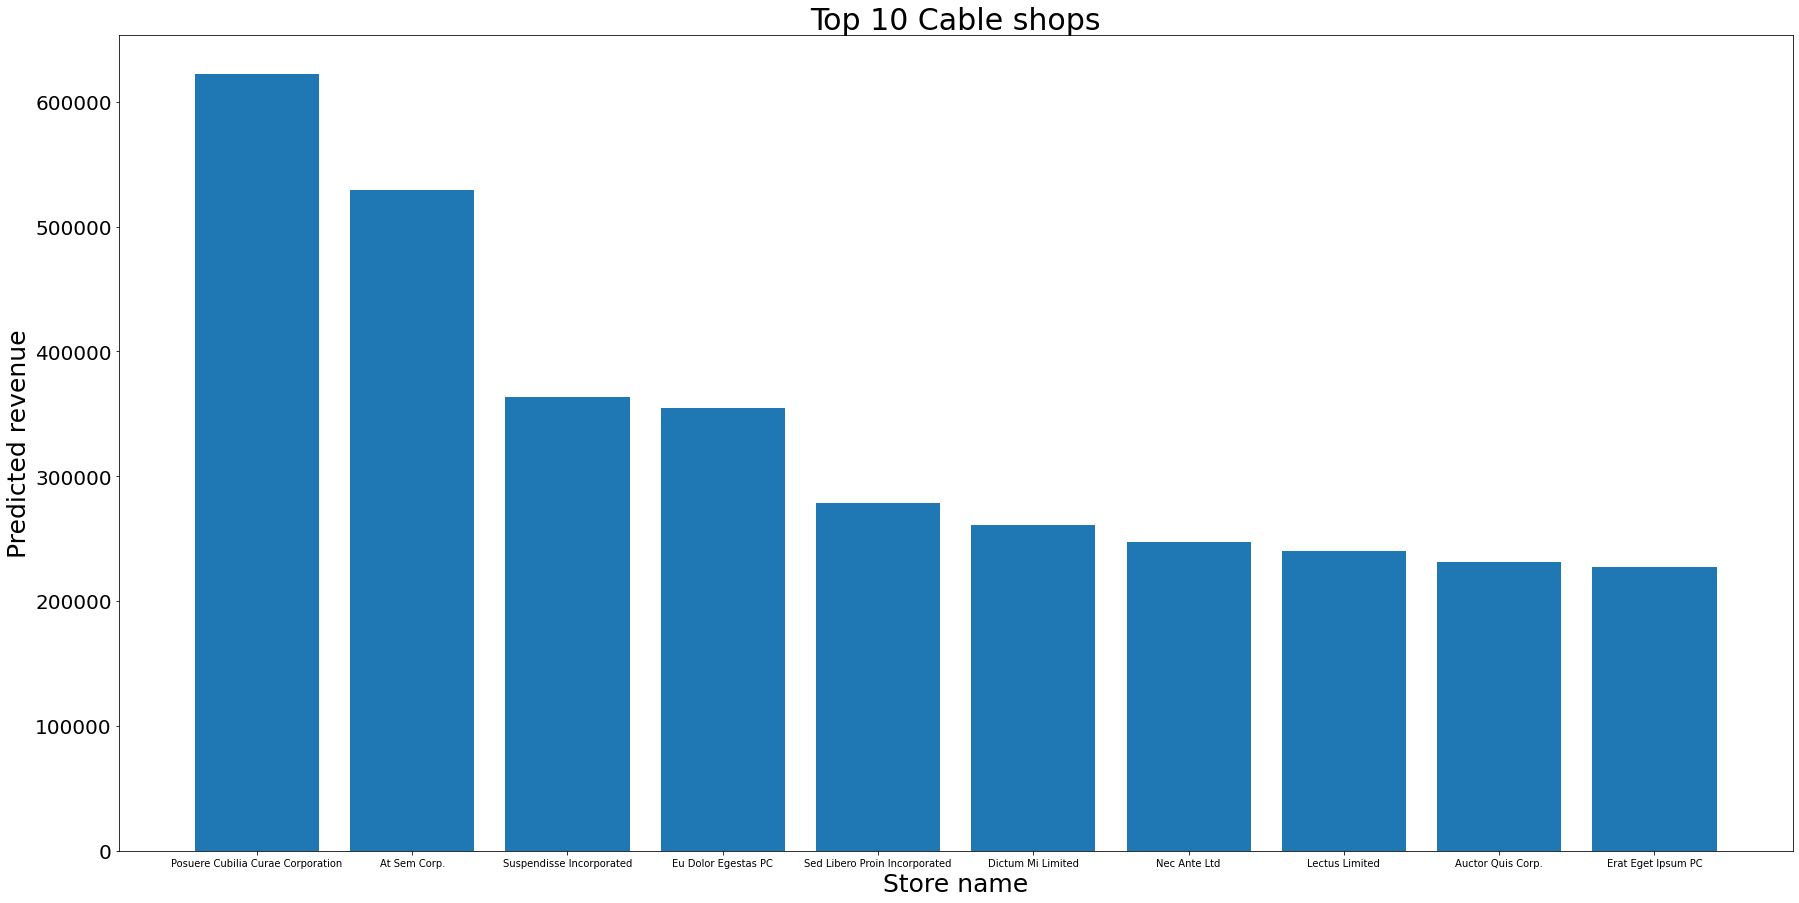

In [76]:
fig, ax = plt.subplots()
plt.bar(top_10_cable["store_name"], top_10_cable["pred_revenue"])
plt.xlabel("Store name", fontsize = 25)
plt.ylabel("Predicted revenue", fontsize = 25)
plt.title("Top 10 Cable shops", fontsize = 30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['savefig.dpi'] = 300
plt.savefig('../plots/top10cable.png')
plt.show()

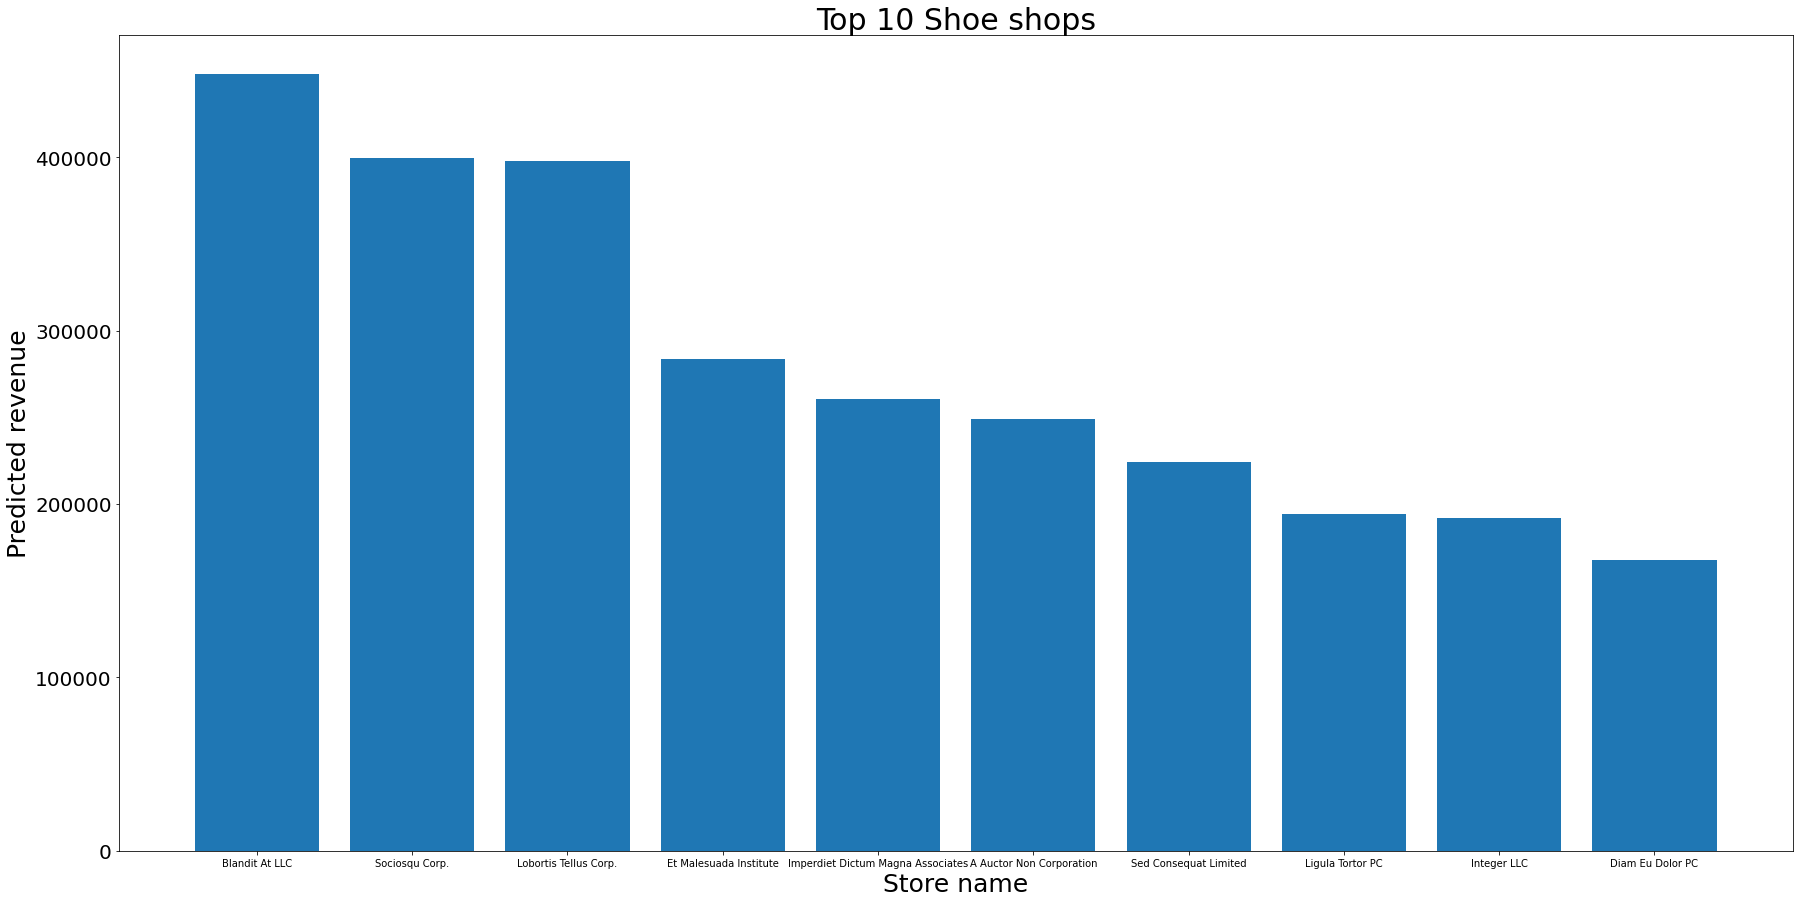

In [77]:
fig, ax = plt.subplots()
plt.bar(top_10_shoe["store_name"], top_10_shoe["pred_revenue"])
plt.xlabel("Store name", fontsize = 25)
plt.ylabel("Predicted revenue", fontsize = 25)
plt.title("Top 10 Shoe shops", fontsize = 30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['savefig.dpi'] = 300
plt.savefig('../plots/top10shoe.png')
plt.show()

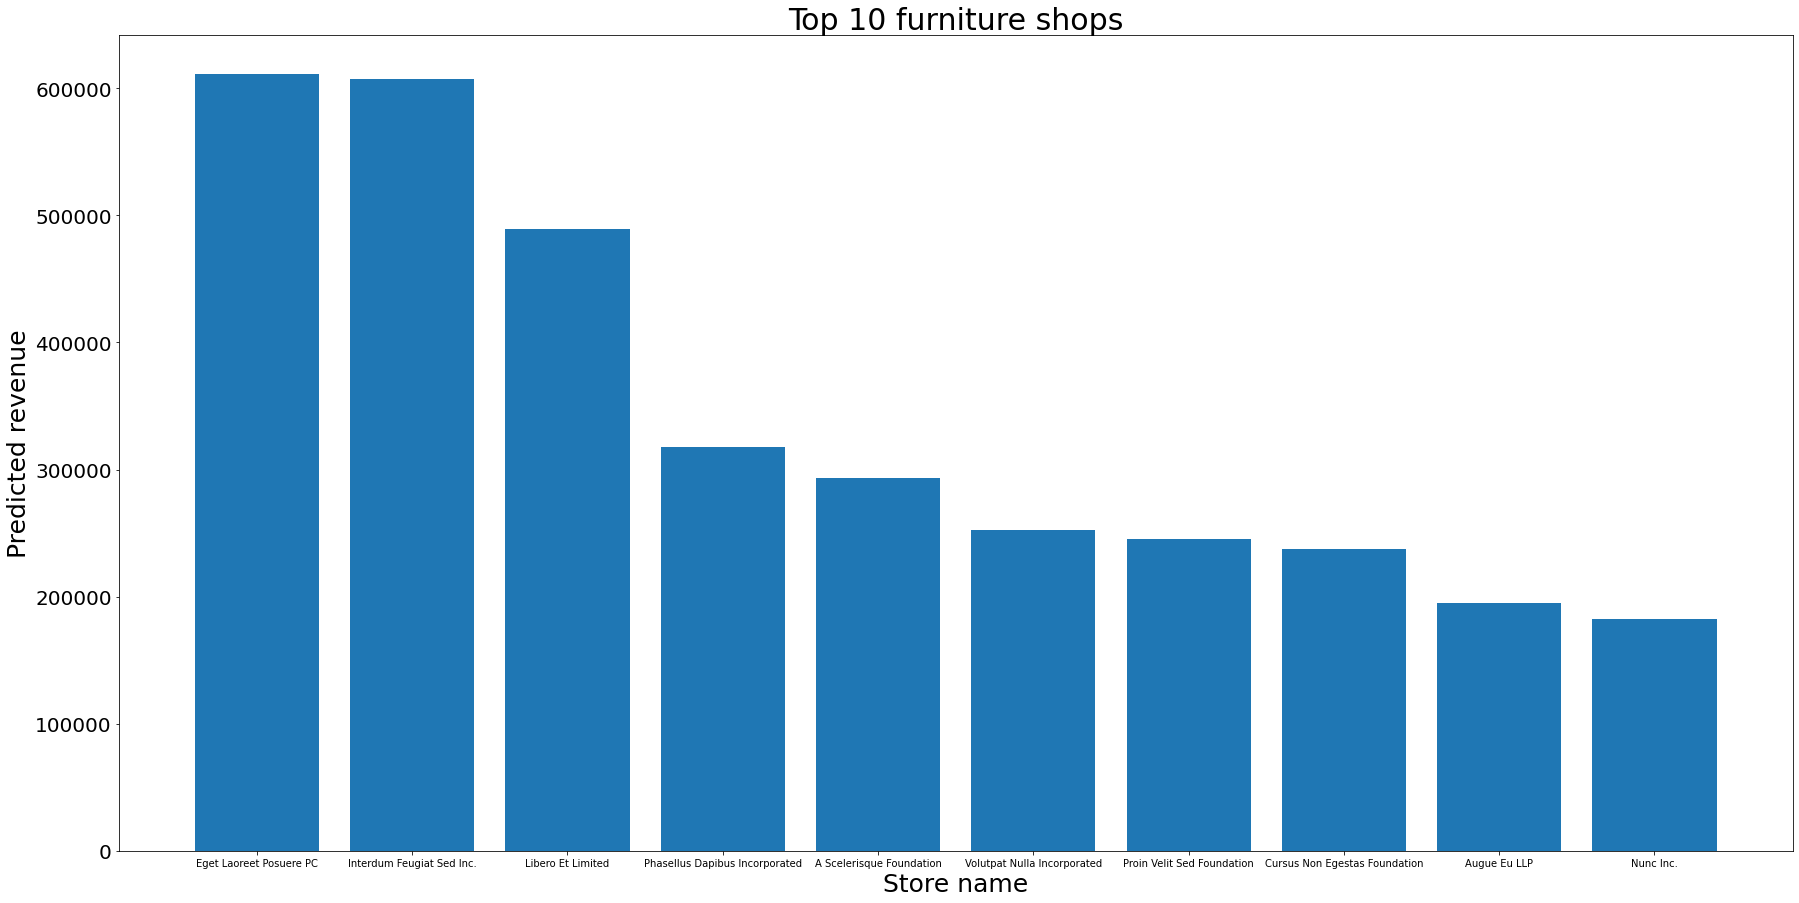

In [78]:
fig, ax = plt.subplots()
plt.bar(top_10_furniture["store_name"], top_10_furniture["pred_revenue"])
plt.xlabel("Store name", fontsize = 25)
plt.ylabel("Predicted revenue", fontsize = 25)
plt.title("Top 10 furniture shops", fontsize = 30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['savefig.dpi'] = 300
plt.savefig('../plots/top10furniture.png')
plt.show()

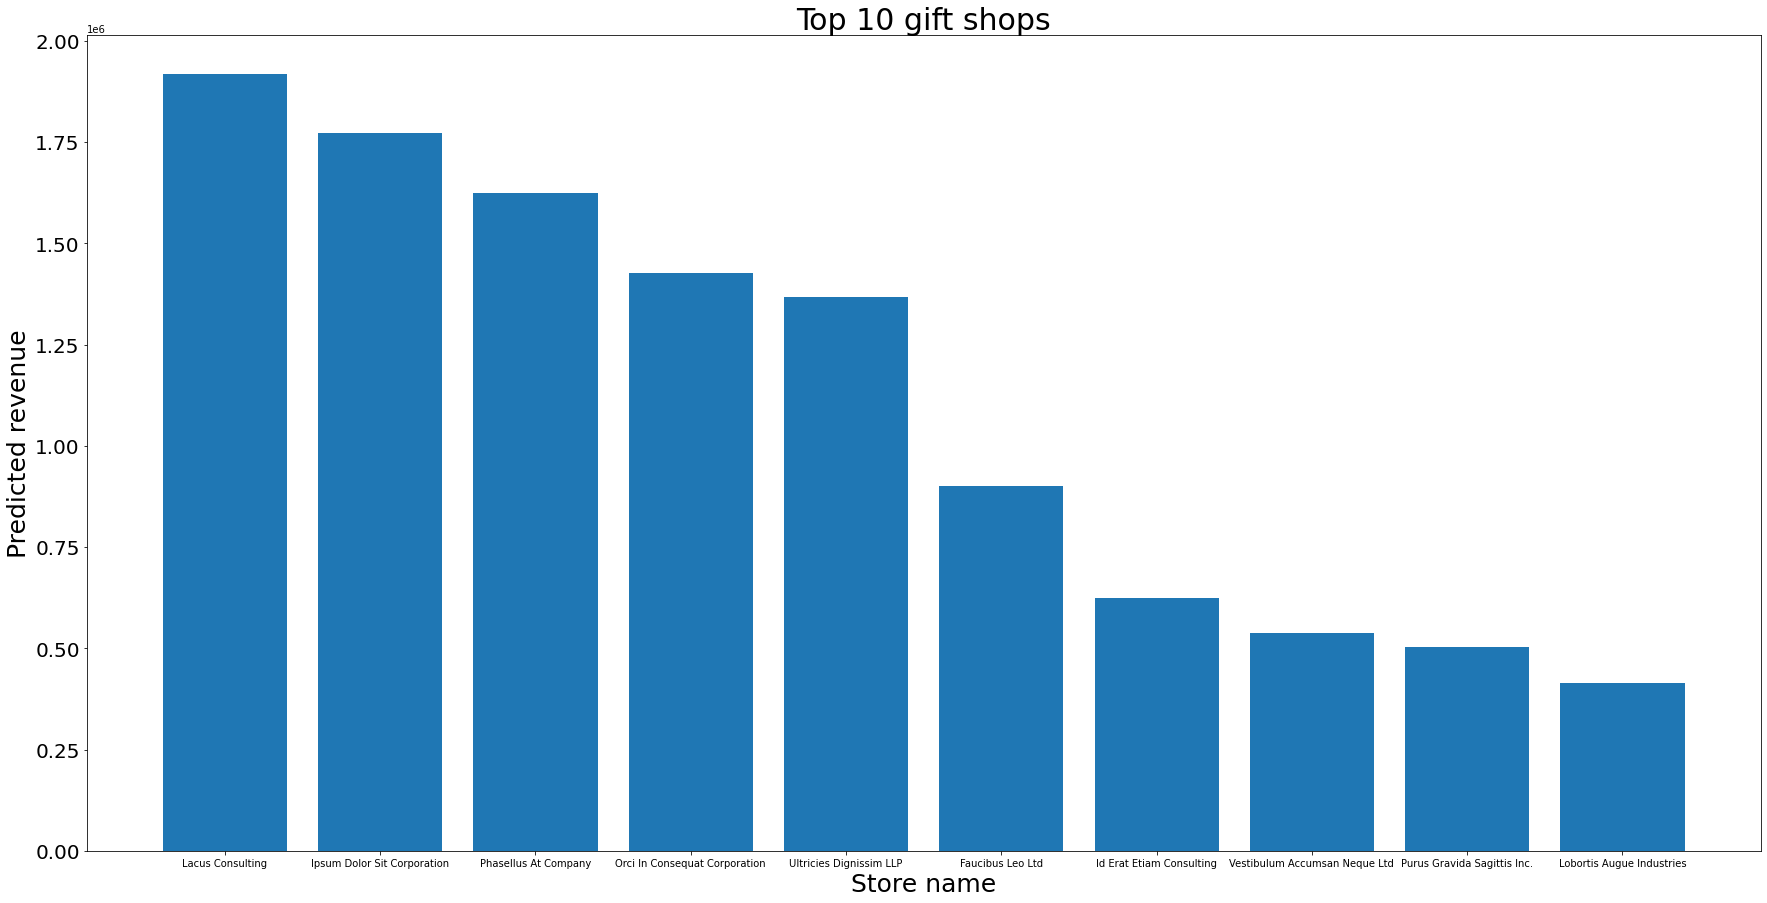

22/10/05 18:43:03 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 260045 ms exceeds timeout 120000 ms
22/10/05 18:43:03 WARN SparkContext: Killing executors is not supported by current scheduler.


In [79]:
fig, ax = plt.subplots()
plt.bar(top_10_gift["store_name"], top_10_gift["pred_revenue"])
plt.xlabel("Store name", fontsize = 25)
plt.ylabel("Predicted revenue", fontsize = 25)
plt.title("Top 10 gift shops", fontsize = 30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['savefig.dpi'] = 300
plt.savefig('../plots/top10gift.png')
plt.show()